<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a01794067-janmenc/blob/main/ibm_modulo_3_data_analysis_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **A01794067**
### **Jose Antonio Mendoza Castro**
### *Data Analysis with Python*

### **Ciencia y analitica de datos**

### **Dra. Maria de la Paz Rico**

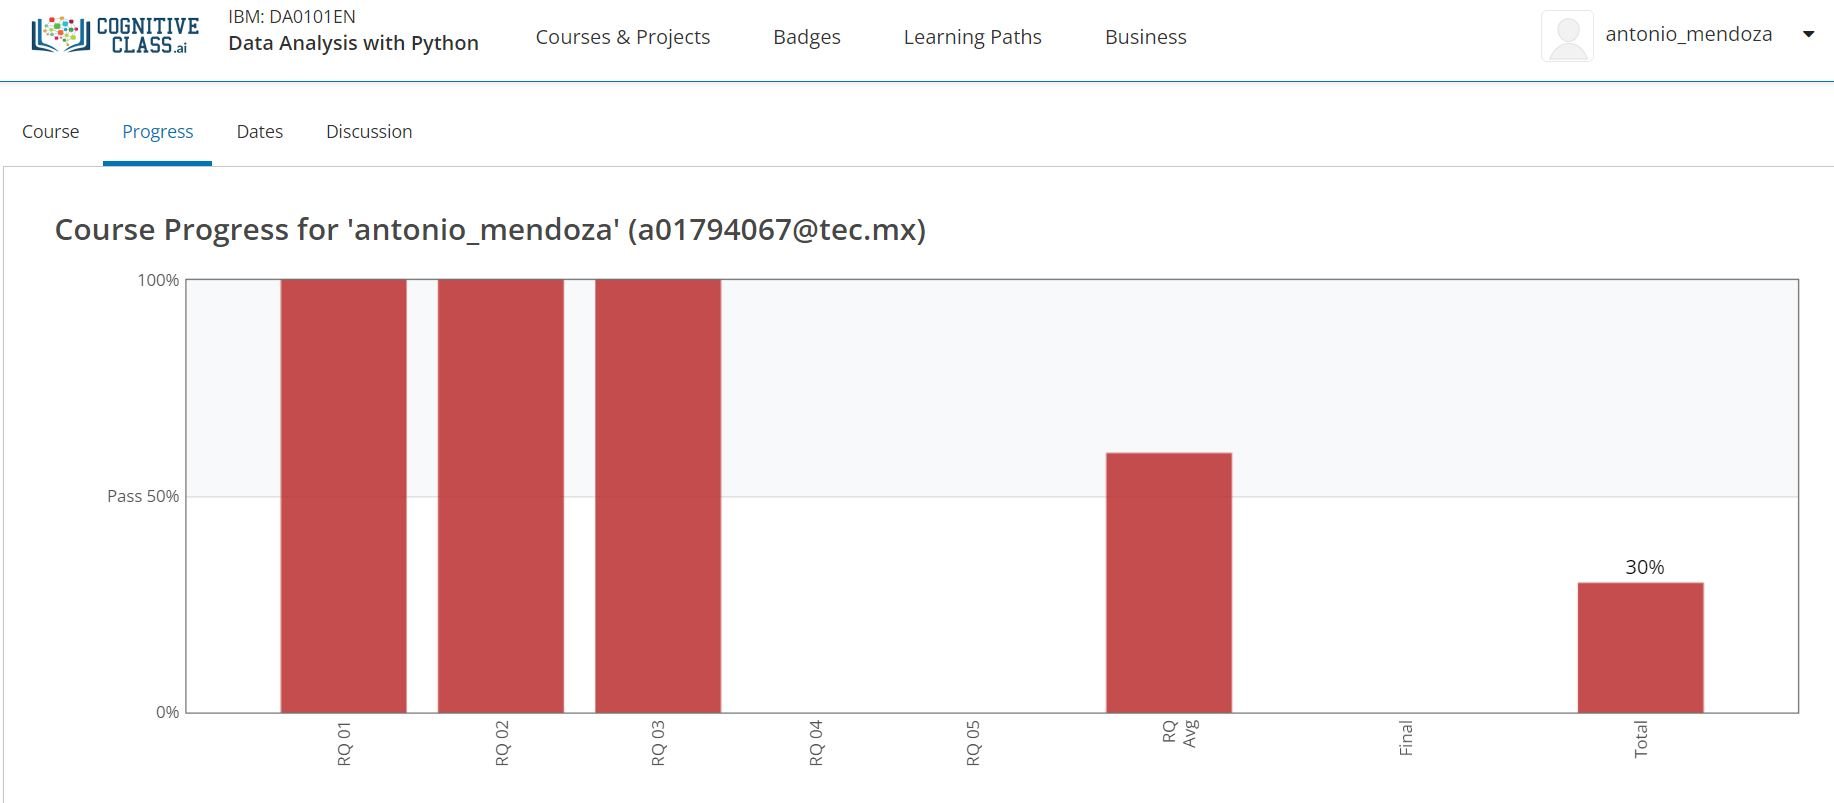

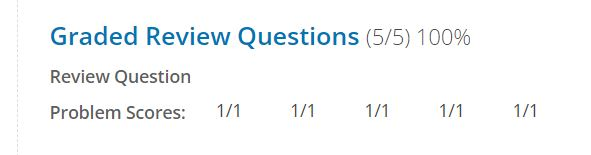

### **Analisis exploratorio de datos**

### Pasos preliminares en el analisis de datos

*   Resumir las caracetristicas principales de los datos 
*   Ganar mejor entendimiento del conjunto de datos
*   Descubrir relaciones entre las variables
*   Extraer variables importantes 

En cuestion en la base de datos con precios de autos en este modulo se busca responder:

**Cuales son las cracteristicas que tienen mas impacto sobre el precio de los autos?**

### **Estadistica descriptiva**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#adquisicion de los datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [4]:
#leemos el archivo omitiendo los 'headers' con el parametro 'header' igual a None
df = pd.read_csv(url, header = None)

In [5]:
#podemos empezar danto un vistazo general a nuestros datos
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [40]:
#ponemos nombre a cada columna de acuerdo a la descripcion de los datos
df.columns = headers

In [8]:
#revisamos que tipo de datos tenmos
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [9]:
#demos un vistazo en la columna 'price'
df['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [10]:
#convertimos la variable precio a 'float'
#como tenemos datos faltantes identificados con el signo '?', primero obtenemos la media omitiendo esos datos
mean_price_tmp = df[df['price'] != '?']['price'].astype(int)
mean_price = np.mean(mean_price_tmp)
#una vez obtenida la media replazamos '?' por la media
df['price'] = df['price'].replace('?', mean_price) 
#finalmente convertimos toda la columna a 'float'
df['price'] = df['price'].astype(float) 

In [11]:
#con el metodo estadistico '.describe()' se puede obtener un resumen estadistico de los datos numericos
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7868.768212
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10595.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [12]:
#por medio del metodo '.value_counts()' podemos resumir variables categoricas
drive_wheels_count = df['drive-wheels'].value_counts()
drive_wheels_count

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

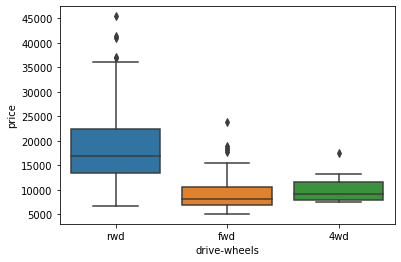

In [13]:
#por medio de 'box-plots' podemos identificar outliers, verla distribucion y sesgo de los datos
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

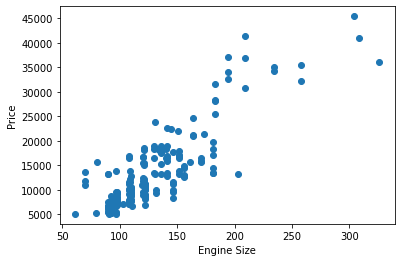

In [15]:
#por otra parte con un scatter-plot podemos ver la relación entre dos variables
x = df['engine-size']
y = df['price']

plt.scatter(x, y)
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

### **GroupingBy en Python**

Por medio del metodo .groupby() podemos aplicarlo sobre varibles categoricas (una o múltiples). 

In [17]:
df_test = df[['drive-wheels', 'body-style', 'price']].copy()
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,10405.064677
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.934363
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [18]:
#por otra parte ademas del metodo '.groupby()' podemos ocupar el metodo '.pivot()'
#este ultimo para desplegar una variable a lo largo de las columnas y otra a lo largo de las filas
df_pivot = df_grp.pivot(index = 'drive-wheels', columns = 'body-style')

In [19]:
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN  10405.064677  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.934363   
rwd              23949.6  24202.714286  14278.269966  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

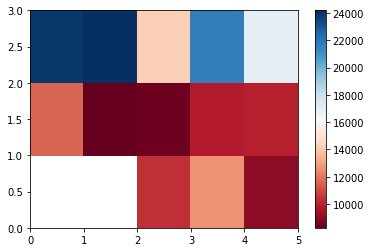

In [20]:
#este ultimo metodo tambien lo podemos representar por medio de un grafico, 'Heatmap'
plt.pcolor(df_pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

### **Analysis of Variance**

* Es una comparacion estadistica entre grupos.
* Encontrando la correlación enytre diferentes grupos de una variable categorica.
* Del ANOVA obtenemos:

> * F-Test Score: Variacion entre la media de grupos de muestra dividida por la variacion dentro del grupo.
* p-value: Grados de confianza. 



In [21]:
#podemos calcular un ANOVA como se hace a contibuacion
import scipy

In [24]:
df_anova = df[['make', 'price']].copy()
grouped_anova = df_anova.groupby(['make'])

In [26]:
anova_results = scipy.stats.f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('subaru')['price'])

In [27]:
anova_results

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

### **Correlacion**

Que es una correlacion?

Mide en que grado dos variables son independientes.

Es importante hacer la observacion que correlacion no implica causalidad.

(0.0, 52127.58585112223)

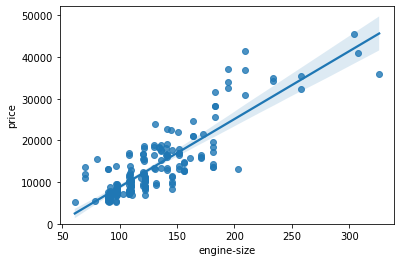

In [29]:
#por ejemplo podemos ver la correlacion entre dos variables
#en este caso estariamos hablando de una correlacion positiva
sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.ylim(0,)

### **Correlacion - Estadistica**

In [35]:
#reemplazamos los valores faltantes en la variable 'horsepower'
mean_hp_tmp = df[df['horsepower'] != '?']['horsepower'].astype(int)
mean_hp = np.mean(mean_hp_tmp)

df['horsepower'] = df['horsepower'].replace('?', mean_price) 
df['horsepower'] = df['horsepower'].astype(int)


In [36]:
#una forma de calcula una correlacion es por medio de la correlacion de pearson
pearson_coef, p_value = scipy.stats.pearsonr(df['horsepower'], df['price'])

In [39]:
print('Pearson coeficient: ', pearson_coef, ' p-value: ', p_value)

Pearson coeficient:  -0.022464731809114534  p-value:  0.7491809114239787
